In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
db = pd.read_csv(r"E:\Mohamed\Excel\Geo Data\adultdata.csv")
#cleaning Data
db.drop(["fnlwgt","capital-gain","capital-loss","marital-status","relationship"],axis=1,inplace=True)

In [139]:
#What is the average age of men and women?
db_men=db[db["sex"]=="Male"]
db_women=db[db["sex"]=="Female"]
av_women=round(db_women["age"].mean(),2)
av_men=round(db_men["age"].mean(),2)
print(f"the average age of men ==> {av_men} Y".title())
print(f"the average age of men ==> {av_women} Y".title())

The Average Age Of Men ==> 39.43 Y
The Average Age Of Men ==> 36.86 Y


In [140]:
#How many people of each Education lvl are represented in this dataset?
cc=db["education"].value_counts()
cc

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [141]:
#What is the percentage of people who have a Bachelor's degree?
bS_deg=round((len(db[db["education"]=="Bachelors"]))/len(db),3)
print(f"the percentage of people who have a Bachelor's degree==> {round(bS_deg*100,2)}%".title())


The Percentage Of People Who Have A Bachelor'S Degree==> 16.4%


In [142]:
#What percentage of people with advanced education (Bachelors13, Masters14, or Doctorate16) make more than 50K?
hEduc=db[db["education"].isin(["Bachelors", "Masters","Doctorate"])]
h_R=round((len(hEduc[hEduc["salary"]==">50K"])/len(hEduc))*100,1)
print(f"percentage of people with advanced education is ==> {h_R}%".title())

Percentage Of People With Advanced Education Is ==> 46.5%


In [143]:
#What percentage of people without advanced education make more than 50K?
lEduc=db[~db["education"].isin(["Bachelors", "Masters","Doctorate"])]
l_R=round((len(lEduc[lEduc["salary"]==">50K"])/len(lEduc))*100,1)
print(f"percentage of people without advanced education is ==> {l_R}%".title())

Percentage Of People Without Advanced Education Is ==> 17.4%


In [144]:
#What is the minimum number of hours a person works per week?
mn_w_h=db["hours-per-week"].min()
print(f"the minimum number of hours a person works per week==> {mn_w_h} Hour")
#What percentage of the people who work the minimum number of hours per week have a salary of more than 50K?
mn_w_h=db[db["hours-per-week"]==1]
min_RR=len(mn_w_h[mn_w_h["salary"]==">50K"])/len(mn_w_h)
print(f"percentage of people who work the minimum number of hours per week have a salary of more than 50K ==> {min_RR*100}%".title())

the minimum number of hours a person works per week==> 1 Hour
Percentage Of People Who Work The Minimum Number Of Hours Per Week Have A Salary Of More Than 50K ==> 10.0%


In [145]:
#What country has the highest percentage of people that earn >50K and what is that percentage? Okey this is hard one
#first we need to find high salaries be 
high_s=db[db["salary"]==">50K"]
#then we find percentage  to find which country got the highest ratio country with rich people
hecp=(high_s["native-country"].value_counts())/(db["native-country"].value_counts())
H_ec=hecp.idxmax()
highest_earning_country_percentage = round((hecp.max()))
print(f"highest earning country is ==> {H_ec}")
print(f"highest earning people percentage in {H_ec} ==> {round(hecp.max(),3)*100}%".title())

highest earning country is ==> Iran
Highest Earning People Percentage In Iran ==> 41.9%


In [146]:
#Identify the most popular occupation for those who earn >50K in India.
high_s=high_s[high_s["native-country"]=="India"]
print(f"the most popular occupation for those who earn >50K in India ==> {high_s['occupation'].value_counts().idxmax()}".title())

The Most Popular Occupation For Those Who Earn >50K In India ==> Prof-Specialty


<AxesSubplot:title={'center':'Edu Lv In Our Data'}, xlabel='Education', ylabel='Count'>

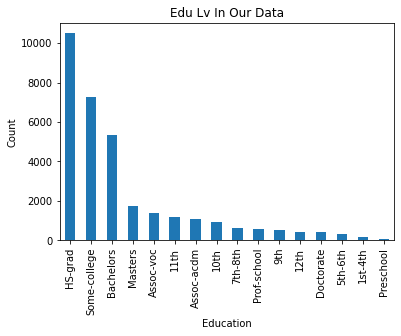

In [147]:
#chart for EDU levels in our data
cc.plot(kind="bar", title='Edu Lv in Our data'.title(), xlabel='Education', ylabel='Count')

<AxesSubplot:title={'center':'Education Lv Make More Than 50K A Year '}, xlabel='Education', ylabel='Count'>

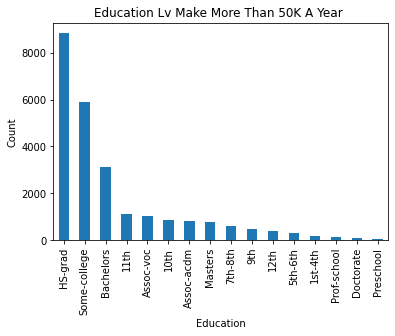

In [148]:
#chart for Education with Hg Salary
e_s_bar=db[db.salary=="<=50K"]
e_s_bar.education.value_counts().plot(kind="bar", title='Education LV make more than 50K a year '.title(), xlabel='Education', ylabel='Count')


<AxesSubplot:title={'center':'Countries Make More Than 50K A Year '}, xlabel='COuntry', ylabel='Count'>

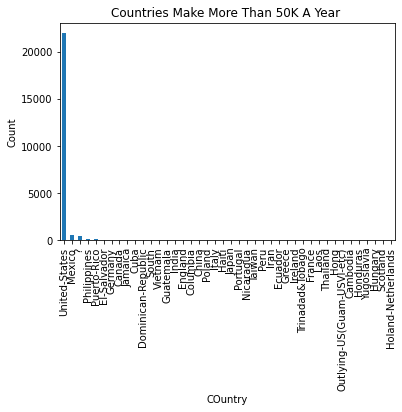

In [149]:
#chart for countries make more than 50 k 
e_s_bar['native-country'].value_counts().plot(kind="bar", title='countries make more than 50K a year '.title(), xlabel='COuntry', ylabel='Count')

<AxesSubplot:title={'center':'Education Lv Make More Than 50K A Year '}, xlabel='Education', ylabel='Count'>

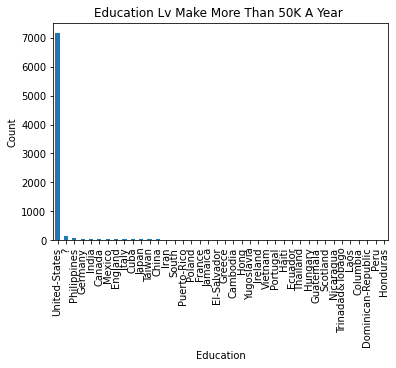

In [157]:
l_s_bar=db[db['salary']=='>50K']
l_s_bar['native-country'].value_counts().plot(kind="bar", title='Education LV make more than 50K a year '.title(), xlabel='Education', ylabel='Count')
